In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/akankshamishra/Downloads'

In [3]:
os.chdir("/Users/akankshamishra/Desktop/capstone/")

In [4]:
customer_data = pd.read_excel("Customer_Data.xlsx")
jtd = pd.read_csv("JTD.csv")

# Cleaning of JTD data

In [5]:
jtd.tail(15)

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
5619469,5619469,962794,10,ACCTBP057,ACCDBP0257,FULL BODY - SAME CLR - SOLID PAINTING,P001,1.0,MIN,35000.00
5619470,5619470,962811,10,HOAM_MENU3,HOAMWH0013,Wheel Alignment,P001,1.0,MIN,398.81
5619471,5619471,962811,20,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,295.85
5619472,5619472,962811,30,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,19.99
5619473,5619473,962811,40,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,17.49
5619474,5619474,962812,10,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,23387.34
5619475,5619475,962813,10,PAINT_SRV,ACCDBP0056,PAINTING FULL BODY - SOLID,P001,22000.0,MIN,26999.90
5619476,5619476,962813,20,ACCT_SRV,ACCDBP0068,DENTING ROOF,P001,1800.0,MIN,2399.99
5619477,5619477,962813,30,ACCT_SRV,ACCDBP0074,MINOR DENTING PER PANEL,P001,550.0,MIN,5549.98
5619478,5619478,962813,40,ACCT_SRV,ACCDBP0120,DENTING RADIATOR MOUNTING PANEL UPPER,P001,850.0,MIN,1050.00


In [6]:
jtd.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

In [7]:
aggregation_jtd_dbno={ 'Description' : {'Description' : lambda x: str(set(x)).strip('{}').replace("'","")},
                      'Item Category' : {'Item Category' : lambda x: str(set(x)).strip('{}').replace("'","")}, 
                      'Order Quantity' : {'Order Quantity' : 'sum'},
                      'Net value' : {'Net value' : 'sum'} }


In [8]:
aggregation_jtd_dbno

{'Description': {'Description': <function __main__.<lambda>(x)>},
 'Item Category': {'Item Category': <function __main__.<lambda>(x)>},
 'Order Quantity': {'Order Quantity': 'sum'},
 'Net value': {'Net value': 'sum'}}

In [9]:
jtd_grouped = jtd.groupby('DBM Order')['Description','Item Category','Order Quantity',
                                       'Net value'].agg(aggregation_jtd_dbno).reset_index()

//anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [10]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"OVERHAUL THROTTLE BODY, MISC_OTHER CHARGES, SH...","P001, P002, P011, P010",731.6,16998.49
1,5,"REPAIR HEADLIGHT HOLDER WIRING (EACH), MISC LA...","P001, P002",290.2,3779.80
2,6,"Paid Service-Minor, MISC LABOR 0.5 HOURS, REPL...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"REPLACE ENGINE OIL & OIL FILTER, WASHER 14MM, ...","P001, P002",69.0,2306.94


In [11]:
jtd_grouped.shape

(973473, 5)

In [12]:
jtd['Description'].value_counts().head(50)

MISC_OTHER CHARGES                        270563
Paid Service-Minor                        201857
WASHING                                   199068
Wheel Alignment                           191211
OIL FILTER                                154387
URANIA SUPREMO CI 4 15W 40                122218
MFC PROLEUM CI4/SL 15W40                   92091
AIR FILTER                                 80211
Wheel Balancing (5 Wheels)                 79970
MISC LABOR 0.5 HOURS                       62982
General Check up                           62459
Paid Service-Major                         60369
WINDSHIELD LIQUID WASHER                   55352
MISC LABOR 0.25 HOURS                      50143
DISTILLED WATER                            46919
Interior & Upholstery Cleaning             44864
REPLACE BRAKE PAD (BOTH SIDE)              38552
PAINTING CHARGES                           34187
MISC LABOR 1 HOUR                          33993
BALANCE WEIGHT 15GRAM                      31791
MISC LABOR 2 HOURS  

In [13]:
jtd.shape

(5619484, 10)

In [14]:
jtd_grouped.isnull().sum()

DBM Order         0
Description       0
Item Category     0
Order Quantity    0
Net value         0
dtype: int64

# Cleaning of customer data

In [15]:
customer_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [16]:
customer_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [17]:
customer_data.shape

(555338, 9)

In [18]:
customer_data["Data Origin"].nunique()

22

In [19]:
customer_data["Partner Type"].value_counts()

1.0       554967
2.0           68
3.0           62
9001.0        57
9003.0        56
4.0           48
9002.0         2
Name: Partner Type, dtype: int64

In [20]:
customer_data.drop(["Marital Status", "Occupation", "Date of Birth", "Death date","Business Partner"],1,
                   inplace=True)

In [21]:
most_frequent_value = customer_data['Partner Type'].mode()
customer_data['Partner Type'] = customer_data['Partner Type'].fillna(most_frequent_value[0])

In [22]:
customer_data['Data Origin'] = customer_data['Data Origin'].fillna(customer_data['Data Origin'].mode()[0])

In [23]:
customer_data['Title'] = customer_data['Title'].fillna(customer_data['Title'].mode()[0])

In [24]:
customer_data.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

In [25]:
customer_data.head()

,Customer No.,Partner Type,Data Origin,Title
0,1,1.0,Z001,2.0
1,2,1.0,Z005,2.0
2,4,1.0,Z005,2.0
3,5,1.0,Z005,2.0
4,7,1.0,Z008,2.0


# Cleaning of final invoice

In [26]:
final_invoice = pd.read_csv("Final_invoice.csv",infer_datetime_format = True)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
pd.set_option('display.max_columns', None)
final_invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [28]:
final_invoice["Job Card No"].nunique()

489329

In [29]:
#final_invoice["Gate Pass Time"].value_counts()

In [30]:
final_invoice.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [31]:
columns_to_be_removed = final_invoice.isnull().sum()[final_invoice.isnull().sum().sort_values() > 29178].index

In [32]:
final_invoice = final_invoice.drop(columns=columns_to_be_removed)

In [33]:
final_invoice.shape

(492314, 29)

In [34]:
final_invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,4051.95,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,1001.29,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,233.14,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,0.00,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,2747.12,BC01SA2


In [35]:
columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp']

In [36]:
final_invoice = final_invoice.drop(columns=columns_irrelevant)

In [37]:
final_invoice.dropna(subset=['Regn No'], inplace=True)

In [38]:
final_invoice.isnull().sum().sort_values()

Unnamed: 0               0
Regn No                  0
Plant Name1              0
Plant                    0
Pin code                 0
Parts Total              0
Order Type               0
OSL Total                0
Misc Total               0
Make                     0
Total Amt Wtd Tax.       0
Labour Total             0
JobCard Time             0
JobCard Date             0
Job Card No              0
Invoice Time             0
Invoice No               0
Invoice Date             0
District                 0
Customer No.             0
Cust Type                0
KMs Reading              0
User ID                  0
CITY                     1
Model                 1524
dtype: int64

In [39]:
final_invoice['Cust Type'] = final_invoice['Cust Type'].fillna(final_invoice['Cust Type'].mode()[0])
final_invoice['CITY'] = final_invoice['CITY'].fillna(final_invoice['CITY'].mode()[0])
final_invoice['Model']  = final_invoice['Model'].fillna(final_invoice['Model'].mode()[0])

In [40]:
final_invoice.rename(columns= {"District" : "State"}, inplace=True)

In [41]:
import datetime
import calendar

In [42]:
final_invoice["Invoice month"] = pd.DatetimeIndex(final_invoice['Invoice Date']).month

In [43]:
final_invoice.drop(["Unnamed: 0"],1,inplace=True)

In [44]:
final_invoice.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month
0,Thane,Retail,67849,Maharashtra,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,KA19MA1291,4051.95,BC01FS1,1
1,THNAE,Retail,84419,Maharashtra,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,MH43R3046,1001.29,BC01SA2,1
2,THANE[W],Retail,81055,Maharashtra,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,AP09AX0582,233.14,BC01SA2,1
3,THNAE,Retail,84419,Maharashtra,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,MH43R3046,0.00,BC01SA2,1
4,THANE,Retail,18980,Maharashtra,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,MH04CD9768,2747.12,BC01SA2,1


# Cleaning of plant master

In [45]:
plant_master = pd.read_excel("Plant Master.xlsx")

In [46]:
plant_master.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [47]:
plant_master.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [48]:
plant_master.shape

(438, 13)

In [49]:
plant = plant_master.drop(columns=['Vendor number plant', 'Valuation Area',
                                      'Factory calendar', 'Name 2', 'House number and street',
                                      'PO Box', 'Sales organization', 'Customer no. - plant'])

In [50]:
plant_master.shape

(438, 13)

In [51]:
plant.isnull().sum()

Plant          0
Name 1         0
Postal Code    0
City           0
State          0
dtype: int64

In [52]:
plant.head()

,Plant,Name 1,Postal Code,City,State
0,BC07,NERKUNDRAM,600107,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,160055,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,400610,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,201010,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,560087,Bengaluru,Karnataka


# Merging data

In [53]:
final_invoice['Customer No.'] = final_invoice['Customer No.'].str.lstrip('0')

In [54]:
customer_data['Customer No.'] = customer_data['Customer No.'].astype(str)

In [55]:
invoice_customer = pd.merge(final_invoice, customer_data, on='Customer No.')

In [56]:
invoice_customer.shape, len(final_invoice['Customer No.'].unique()), len(customer_data['Customer No.'].unique()), len(invoice_customer['Customer No.'].unique())

((492296, 28), 253480, 555338, 253478)

In [57]:
invoice_customer.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
State                 0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
Invoice month         0
Partner Type          0
Data Origin           0
Title                 0
dtype: int64

In [58]:
invoice_customer.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title
0,Thane,Retail,67849,Maharashtra,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,KA19MA1291,4051.95,BC01FS1,1,1.0,Z007,2.0
1,Thane,Retail,67849,Maharashtra,2014-08-14,7000137359,17:54:30,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,6249.87,Accidental,4230.25,400601,BC01,THANE,KA19MA1291,11470.10,BC01FS1,8,1.0,Z007,2.0
2,Thane,Retail,67849,Maharashtra,2014-08-16,7000137489,10:52:30,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7325.09,Paid Service,14546.14,400601,BC01,THANE,KA19MA1291,28344.28,BC01FS1,8,1.0,Z007,2.0
3,Thane,Retail,67849,Maharashtra,2014-10-09,7000151113,17:35:30,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,0.00,Running Repairs,200.00,400601,BC01,THANE,KA19MA1291,200.00,BC01SA1,10,1.0,Z007,2.0
4,Thane,Retail,67849,Maharashtra,2014-12-31,7000175211,18:41:00,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7850.09,Accidental,20348.81,400601,BC01,THANE,KA19MA1291,30458.92,BC01FS1,12,1.0,Z007,2.0


In [59]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"OVERHAUL THROTTLE BODY, MISC_OTHER CHARGES, SH...","P001, P002, P011, P010",731.6,16998.49
1,5,"REPAIR HEADLIGHT HOLDER WIRING (EACH), MISC LA...","P001, P002",290.2,3779.80
2,6,"Paid Service-Minor, MISC LABOR 0.5 HOURS, REPL...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"REPLACE ENGINE OIL & OIL FILTER, WASHER 14MM, ...","P001, P002",69.0,2306.94


In [60]:
jtd_grouped["Item Category"].value_counts()

P001, P002                      348077
P001                            272818
P001, P002, P011                 98723
P011                             43020
P002, P011                       36965
G2TX                             36854
P002                             32048
P001, P002, P011, P010           26518
P001, P011                       21578
P001, P002, P010                 21315
P010                              8670
P002, P010                        6507
G2TX, P002                        5262
P002, P011, P010                  4676
P001, P010                        2903
P011, P010                        2194
G2TX, P001, P002                  1811
G2TX, P001                        1208
P001, P011, P010                   900
G2TX, P011                         544
G2TX, P002, P011                   416
G2TX, P001, P002, P011             278
P002, P011, G2TX, P001, P010        63
G2TX, P001, P011                    59
G2TX, P001, P002, P010              30
G2TX, P002, P010         

In [61]:
plant.head()

,Plant,Name 1,Postal Code,City,State
0,BC07,NERKUNDRAM,600107,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,160055,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,400610,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,201010,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,560087,Bengaluru,Karnataka


In [62]:
plant.shape

(438, 5)

In [63]:
plant.rename(columns= {"State" : "State_Plant"}, inplace=True)

In [64]:
invoice_customer_plant = pd.merge(invoice_customer,plant, on='Plant')

In [65]:
invoice_customer_plant.head(5)

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title,Name 1,Postal Code,City,State_Plant
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,600406,X006,X006 - A.M.MOTORS,MH03AB0789,2201.78,X006SA1,6,1.0,Z010,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,2874.80,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,3151.06,421301,X006,X006 - A.M.MOTORS,MH04CT295,6025.86,X006WM1,7,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,54231,2799.96,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,664.04,421301,X006,X006 - A.M.MOTORS,MH04CT295,3464.00,X006WM1,9,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,55118,554.95,HYUNDAI,0.0,VERNA,0.0,Running Repairs,1510.80,400096,X006,X006 - A.M.MOTORS,MH43AN1186,2065.75,X006SA1,10,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,182687,75.02,MAHINDRA & MAHINDRA,0.0,LOGAN D,0.0,Running Repairs,578.43,400607,X006,X006 - A.M.MOTORS,MH04DN6210,653.45,X006SA1,5,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra


In [66]:
invoice_customer_plant["Name 1"].value_counts()

NERKUNDRAM                        11815
SAS NAGAR - MOHALI                 7403
X006 - A.M.MOTORS                  6505
X025 - SHIVALIK AUTOMOBILES        5497
X013 - SAI AUTO WORKS              4971
X020 - SURYABALA SERVICE           4432
X012 - SR CAR CARE                 4427
X036 - X-PRESS MOTORS              4286
X022 - ARASU CAR ACCESSORIES       4078
X102 - WEST COAST AUTOMOTIVE       4026
X005 - KLN MOTORS                  3993
X007 - OM SRI SATYA SAI AUTOMO     3742
X014 - NANGAN MOTORS PVT LTD.      3639
X062 - S N S MOTORS MYSORE         3610
X034 - SOHAMM MOTORS               3443
X017 - HEM KIRAN DIESELS           3328
X029 - SWAMI AUTO CARE PVT LTD     3284
X003 - Om Sri Satya Sai Automo     3267
X033 - TRISTAR INDIA TRADING       3263
X021 - THE TRUE SAI MOTORSS        3107
X024 - ARASU CAR ACC (TRICHY)      3022
X109 - NANGAN MOTORS PVT. LTD      2949
X023 - ROYAL KRR AUTOS             2857
X103 - DAYAL MOTORS                2831
X047 - X-PRESS MOTORS              2756


In [67]:
invoice_customer_plant.drop(["Postal Code","Plant","City","State_Plant"],1, inplace = True)

In [68]:
invoice_customer_plant.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title,Name 1
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,600406,X006 - A.M.MOTORS,MH03AB0789,2201.78,X006SA1,6,1.0,Z010,2.0,X006 - A.M.MOTORS
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,2874.80,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,3151.06,421301,X006 - A.M.MOTORS,MH04CT295,6025.86,X006WM1,7,1.0,Z001,2.0,X006 - A.M.MOTORS
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,54231,2799.96,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,664.04,421301,X006 - A.M.MOTORS,MH04CT295,3464.00,X006WM1,9,1.0,Z001,2.0,X006 - A.M.MOTORS
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,55118,554.95,HYUNDAI,0.0,VERNA,0.0,Running Repairs,1510.80,400096,X006 - A.M.MOTORS,MH43AN1186,2065.75,X006SA1,10,1.0,Z001,2.0,X006 - A.M.MOTORS
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,182687,75.02,MAHINDRA & MAHINDRA,0.0,LOGAN D,0.0,Running Repairs,578.43,400607,X006 - A.M.MOTORS,MH04DN6210,653.45,X006SA1,5,1.0,Z001,2.0,X006 - A.M.MOTORS


In [69]:
import seaborn as sns

In [70]:
invoice_customer_plant.describe()

,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Total Amt Wtd Tax.,Invoice month,Partner Type,Title
count,2.557540e+05,255754.000000,2.557540e+05,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000
mean,7.154316e+09,348892.072120,8.454848e+04,1647.134252,196.013643,147.131363,2315.776703,482079.179098,4306.055961,6.791217,1.459883,1.961655
std,4.901045e+07,102284.060465,1.412618e+05,4858.893926,1877.049774,1502.267100,8192.674795,172344.322657,11677.718916,2.984243,64.170792,0.192029
min,7.000000e+09,119.000000,1.000000e+00,-137.000000,-0.010000,0.000000,-0.010000,0.000000,-137.000000,1.000000,1.000000,1.000000
25%,7.153601e+09,280215.750000,3.534250e+04,1.010000,0.000000,0.000000,0.000000,401107.000000,250.430000,5.000000,1.000000,2.000000
50%,7.160202e+09,363786.500000,6.386600e+04,446.940000,0.000000,0.000000,108.285000,560067.000000,1161.540000,7.000000,1.000000,2.000000
75%,7.175002e+09,431837.750000,1.001878e+05,1366.935000,0.000000,0.000000,2045.140000,608003.000000,4085.360000,9.000000,1.000000,2.000000
max,7.241600e+09,499962.000000,9.999999e+06,323000.000000,350000.000000,88555.310000,598003.480000,999999.000000,648203.490000,12.000000,9003.000000,2.000000


In [73]:
invoice_customer_plant["KMs Reading"] = invoice_customer_plant["KMs Reading"].astype(int)
invoice_customer_plant.loc[invoice_customer_plant["KMs Reading"] <= 100000, "KMs Reading"] = 0

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 100000) 
                           & (invoice_customer_plant["KMs Reading"] <= 200000), "KMs Reading"] = 1

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 200000) 
                           & (invoice_customer_plant["KMs Reading"] <= 300000), "KMs Reading"] = 2
invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 300000) 
                           & (invoice_customer_plant["KMs Reading"] <= 400000), "KMs Reading"] = 3

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 400000) 
                           & (invoice_customer_plant["KMs Reading"] <= 500000), "KMs Reading"] = 4

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 500000) 
                           & (invoice_customer_plant["KMs Reading"] <= 600000), "KMs Reading"] = 5

invoice_customer_plant.loc[(invoice_customer_plant["KMs Reading"] > 600000) 
                           & (invoice_customer_plant["KMs Reading"] <= 700000), "KMs Reading"] = 6

invoice_customer_plant.loc[invoice_customer_plant["KMs Reading"] > 700000, "KMs Reading"] = 7


In [74]:
invoice_customer_plant["KMs Reading"].value_counts()

0    191538
1     52137
2      7720
3      1680
7      1508
4       541
5       343
6       287
Name: KMs Reading, dtype: int64

In [75]:
invoice_customer_plant.head()

,CITY,Cust Type,Customer No.,State,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Invoice month,Partner Type,Data Origin,Title,Name 1
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,0,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,600406,X006 - A.M.MOTORS,MH03AB0789,2201.78,X006SA1,6,1.0,Z010,2.0,X006 - A.M.MOTORS
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,0,2874.80,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,3151.06,421301,X006 - A.M.MOTORS,MH04CT295,6025.86,X006WM1,7,1.0,Z001,2.0,X006 - A.M.MOTORS
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,0,2799.96,MARUTI SUZUKI,0.0,SWIFT,0.0,Running Repairs,664.04,421301,X006 - A.M.MOTORS,MH04CT295,3464.00,X006WM1,9,1.0,Z001,2.0,X006 - A.M.MOTORS
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,0,554.95,HYUNDAI,0.0,VERNA,0.0,Running Repairs,1510.80,400096,X006 - A.M.MOTORS,MH43AN1186,2065.75,X006SA1,10,1.0,Z001,2.0,X006 - A.M.MOTORS
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,1,75.02,MAHINDRA & MAHINDRA,0.0,LOGAN D,0.0,Running Repairs,578.43,400607,X006 - A.M.MOTORS,MH04DN6210,653.45,X006SA1,5,1.0,Z001,2.0,X006 - A.M.MOTORS


In [76]:
invoice_customer_plant.describe()

,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Total Amt Wtd Tax.,Invoice month,Partner Type,Title
count,2.557540e+05,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000
mean,7.154316e+09,348892.072120,0.347107,1647.134252,196.013643,147.131363,2315.776703,482079.179098,4306.055961,6.791217,1.459883,1.961655
std,4.901045e+07,102284.060465,0.812358,4858.893926,1877.049774,1502.267100,8192.674795,172344.322657,11677.718916,2.984243,64.170792,0.192029
min,7.000000e+09,119.000000,0.000000,-137.000000,-0.010000,0.000000,-0.010000,0.000000,-137.000000,1.000000,1.000000,1.000000
25%,7.153601e+09,280215.750000,0.000000,1.010000,0.000000,0.000000,0.000000,401107.000000,250.430000,5.000000,1.000000,2.000000
50%,7.160202e+09,363786.500000,0.000000,446.940000,0.000000,0.000000,108.285000,560067.000000,1161.540000,7.000000,1.000000,2.000000
75%,7.175002e+09,431837.750000,1.000000,1366.935000,0.000000,0.000000,2045.140000,608003.000000,4085.360000,9.000000,1.000000,2.000000
max,7.241600e+09,499962.000000,7.000000,323000.000000,350000.000000,88555.310000,598003.480000,999999.000000,648203.490000,12.000000,9003.000000,2.000000


In [77]:
invoice_customer_plant.shape, invoice_customer_plant.columns

((255754, 28),
 Index(['CITY', 'Cust Type', 'Customer No.', 'State', 'Invoice Date',
        'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
        'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
        'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code',
        'Plant Name1', 'Regn No', 'Total Amt Wtd Tax.', 'User ID',
        'Invoice month', 'Partner Type', 'Data Origin', 'Title', 'Name 1'],
       dtype='object'))

In [78]:
invoice_customer_plant['Invoice Date'] = pd.to_datetime(invoice_customer_plant['Invoice Date'])

In [79]:
invoice_customer_plant['Invoice Date Time'] = invoice_customer_plant['Invoice Date'].astype(str).str.cat(invoice_customer_plant[['Invoice Time']].astype(str),sep=' ')

In [80]:
invoice_customer_plant['JobCard Date'] =  pd.to_datetime(invoice_customer_plant['JobCard Date'])

In [81]:
invoice_customer_plant['JobCard Date Time'] = invoice_customer_plant['JobCard Date'].astype(str).str.cat(invoice_customer_plant[['JobCard Time']].astype(str), sep=' ')

In [82]:
invoice_customer_plant.loc[:, ['JobCard Date Time', 'JobCard Date','JobCard Time']].head()

,JobCard Date Time,JobCard Date,JobCard Time
0,2015-06-19 13:56:32,2015-06-19,13:56:32
1,2016-07-18 15:49:34,2016-07-18,15:49:34
2,2016-08-30 10:10:59,2016-08-30,10:10:59
3,2016-10-18 17:47:35,2016-10-18,17:47:35
4,2015-05-28 17:57:40,2015-05-28,17:57:40


In [83]:
invoice_customer_plant.loc[:, ['Invoice Date Time', 'Invoice Date','Invoice Time']].head()

,Invoice Date Time,Invoice Date,Invoice Time
0,2015-06-19 18:10:34,2015-06-19,18:10:34
1,2016-07-20 10:26:00,2016-07-20,10:26:00
2,2016-09-04 11:12:47,2016-09-04,11:12:47
3,2016-10-28 13:17:54,2016-10-28,13:17:54
4,2015-05-28 18:20:37,2015-05-28,18:20:37


In [84]:
invoice_customer_plant['Invoice Date Time'] = pd.to_datetime(invoice_customer_plant['Invoice Date Time'])

In [85]:
invoice_customer_plant['JobCard Date Time'] = pd.to_datetime(invoice_customer_plant['JobCard Date Time'])

In [86]:
invoice_customer_plant['ServiceTime'] = invoice_customer_plant['Invoice Date Time']-invoice_customer_plant['JobCard Date Time']

In [87]:
invoice_customer_plant.loc[:, ['ServiceTime']].head()

,ServiceTime
0,0 days 04:14:02
1,1 days 18:36:26
2,5 days 01:01:48
3,9 days 19:30:19
4,0 days 00:22:57


In [88]:
invoice_customer_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,255754
mean,4 days 06:36:08.553336
std,12 days 18:05:19.842755
min,-1 days +23:59:27
25%,0 days 01:54:30
50%,0 days 08:08:20.500000
75%,3 days 01:43:06.500000
max,495 days 03:25:24


In [89]:
invoice_customer_plant = invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>pd.Timedelta(hours=0),:]

In [90]:
invoice_customer_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,255753
mean,4 days 06:36:09.997704
std,12 days 18:05:21.754925
min,0 days 00:00:36
25%,0 days 01:54:30
50%,0 days 08:08:21
75%,3 days 01:43:08
max,495 days 03:25:24


In [91]:
invoice_customer_plant["Order Type"].value_counts()

Running Repairs      145444
Paid Service          72424
Accidental            21241
Mechanical            12910
SMC Redemption         2028
SMC Value Package      1431
Repeat Order            258
WBW Order                17
Name: Order Type, dtype: int64

In [92]:
invoice_customer_plant['ServiceTime_category']=None
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=13),'ServiceTime_category']='super_fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=13))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=36)),'ServiceTime_category']='fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=36))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=61)),'ServiceTime_category']='mid'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=61))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=84)),'ServiceTime_category']='slow'
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=84),'ServiceTime_category']='super_slow'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
invoice_customer_plant.drop(columns=
                            ['Invoice Time', 'Invoice Date', 'Invoice No', 'JobCard Date', 'JobCard Time','Model','Pin code','Plant Name1','User ID','Name 1','CITY','Invoice Date Time','JobCard Date Time','ServiceTime'],
                            inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Merging jtd and invoice data

In [94]:
len(invoice_customer_plant['Job Card No'].unique()), len(jtd_grouped['DBM Order'].unique())

(253199, 973473)

In [95]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"OVERHAUL THROTTLE BODY, MISC_OTHER CHARGES, SH...","P001, P002, P011, P010",731.6,16998.49
1,5,"REPAIR HEADLIGHT HOLDER WIRING (EACH), MISC LA...","P001, P002",290.2,3779.80
2,6,"Paid Service-Minor, MISC LABOR 0.5 HOURS, REPL...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"REPLACE ENGINE OIL & OIL FILTER, WASHER 14MM, ...","P001, P002",69.0,2306.94


In [96]:
invoice_customer_plant.head(2)

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid


In [97]:
invoice_customer_plant_jtd = pd.merge(invoice_customer_plant, jtd_grouped, 
                                               left_on='Job Card No', right_on='DBM Order').drop('DBM Order', axis=1)

In [98]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"INSULATION TAPE, HEAD LIGHT HOLDER, BALANCE WE...","P001, P002",45.5,2201.78
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"HANDLE ASSY,BACK DOO, OIL FILTER-SPIN ON PETRO...","P001, P002",202.5,6025.86
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"MISC LABOR 0.5 HOURS, REPLACE CAMSHAFT OIL SEA...","P001, P002",189.0,3464.00
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"Paid Service-Minor, MFC PROLEUM C14/SL 15W40, ...","P001, P002",7.0,2065.75
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"REMOVE & REFIT WIPER BLADE REAR, WIPER T, NOZZ...","P001, P002",13.0,653.45


In [99]:
invoice_customer_plant_jtd.isnull().sum()

Cust Type               0
Customer No.            0
State                   0
Job Card No             0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
OSL Total               0
Order Type              0
Parts Total             0
Regn No                 0
Total Amt Wtd Tax.      0
Invoice month           0
Partner Type            0
Data Origin             0
Title                   0
ServiceTime_category    0
Description             0
Item Category           0
Order Quantity          0
Net value               0
dtype: int64

In [100]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"INSULATION TAPE, HEAD LIGHT HOLDER, BALANCE WE...","P001, P002",45.5,2201.78
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"HANDLE ASSY,BACK DOO, OIL FILTER-SPIN ON PETRO...","P001, P002",202.5,6025.86
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"MISC LABOR 0.5 HOURS, REPLACE CAMSHAFT OIL SEA...","P001, P002",189.0,3464.00
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"Paid Service-Minor, MFC PROLEUM C14/SL 15W40, ...","P001, P002",7.0,2065.75
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"REMOVE & REFIT WIPER BLADE REAR, WIPER T, NOZZ...","P001, P002",13.0,653.45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

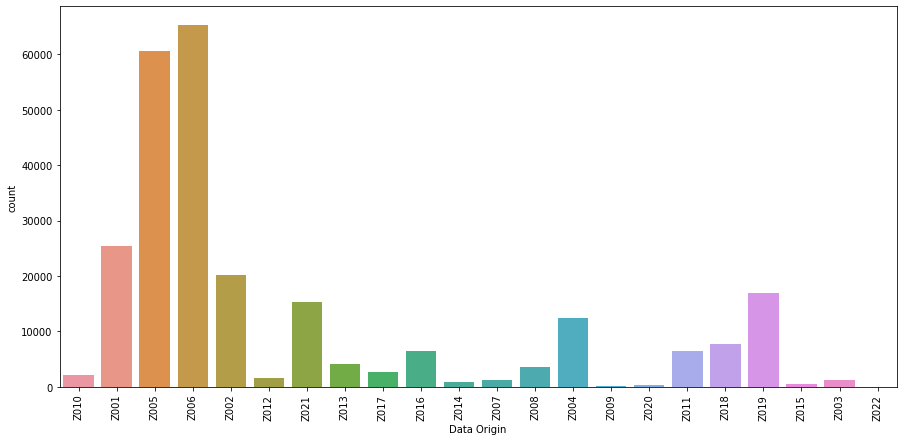

In [164]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Data Origin"])
plt.xticks(rotation = 90)

In [166]:
invoice_customer_plant_jtd["Order Type"].value_counts()

Running Repairs      145429
Paid Service          72415
Accidental            21227
Mechanical            12910
SMC Redemption         2028
SMC Value Package      1431
Repeat Order            258
WBW Order                16
Name: Order Type, dtype: int64

Text(0.5, 1.0, 'Order Type Trends')

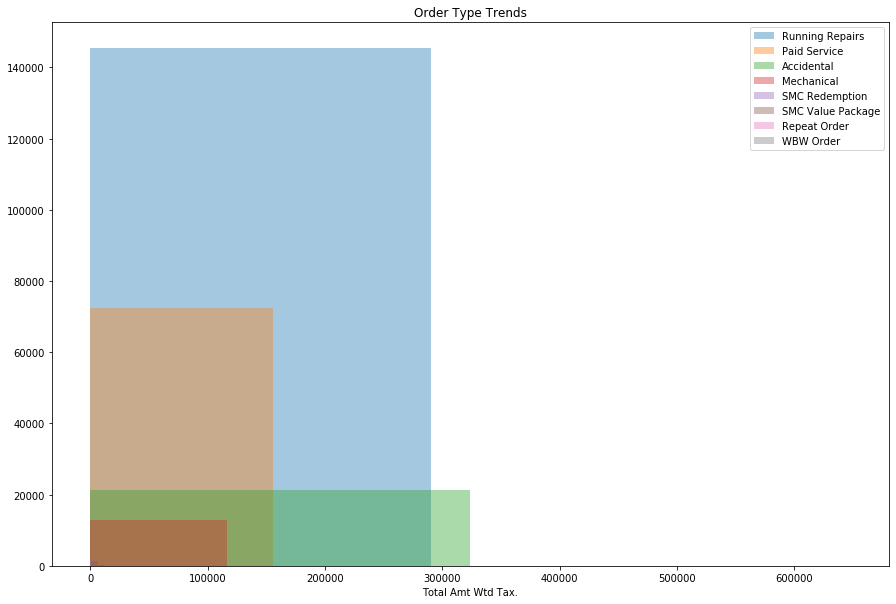

In [167]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Running Repairs"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Running Repairs", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Paid Service"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Paid Service", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Accidental"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Accidental", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Mechanical"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Mechanical", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="SMC Redemption"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SMC Redemption", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="SMC Value Package"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SMC Value Package", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Repeat Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Repeat Order", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="WBW Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "WBW Order", ax = axes, kde =False)
ax.legend()
ax.set_title('Order Type Trends')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

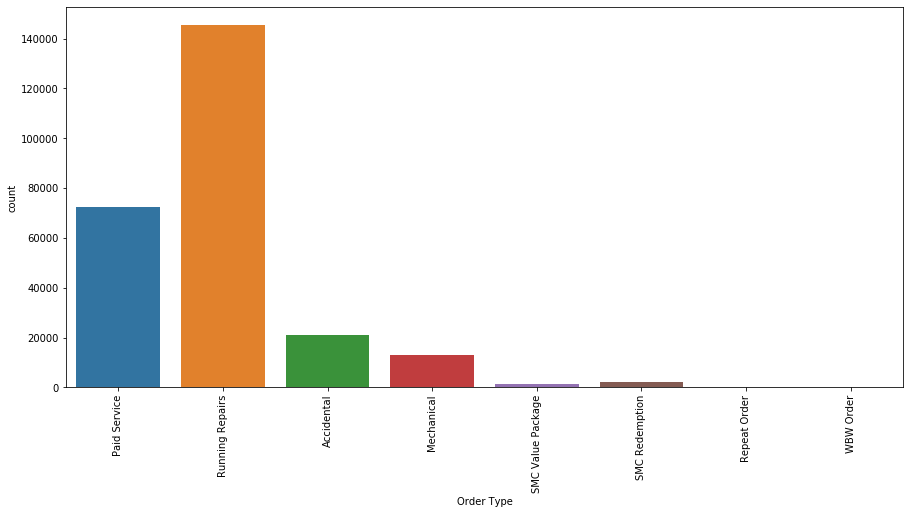

In [165]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Order Type"])
plt.xticks(rotation = 90)

In [168]:
invoice_customer_plant_jtd["Cust Type"].value_counts()

Retail              255368
Corporate others       154
Corporate- M&M         134
Fleets                  30
Franchise               15
MFCWL                   13
Name: Cust Type, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

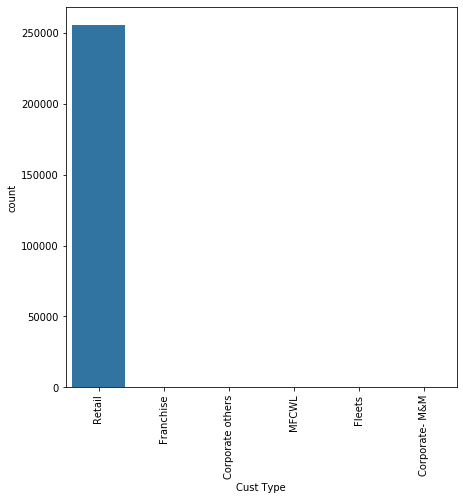

In [171]:
plt.figure(figsize=(7,7))
sns.countplot(invoice_customer_plant_jtd["Cust Type"])
plt.xticks(rotation = 90)

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le = LabelEncoder()

In [103]:
invoice_customer_plant_jtd_categroical = invoice_customer_plant_jtd[['Cust Type', 'Order Type', "Make", "State", 'ServiceTime_category',"Data Origin"]]

In [104]:
invoice_customer_plant_jtd_categroical.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin
0,Retail,Paid Service,FORD,Maharashtra,super_fast,Z010
1,Retail,Running Repairs,MARUTI SUZUKI,Maharashtra,mid,Z001
2,Retail,Running Repairs,MARUTI SUZUKI,Maharashtra,super_slow,Z001
3,Retail,Running Repairs,HYUNDAI,Maharashtra,super_slow,Z001
4,Retail,Running Repairs,MAHINDRA & MAHINDRA,Maharashtra,super_fast,Z001


In [105]:
invoice_encoded = invoice_customer_plant_jtd_categroical.apply(le.fit_transform)

In [106]:
import numpy as np

In [107]:
invoice_numerical = invoice_customer_plant_jtd.select_dtypes(include=[np.number])

In [108]:
cluster_data = pd.concat([invoice_encoded,invoice_numerical], axis=1)

In [109]:
cluster_data.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Net value
0,5,2,5,20,3,9,227460,0,1802.05,0.0,0.0,399.73,2201.78,6,1.0,2.0,45.5,2201.78
1,5,4,13,20,1,0,413455,0,2874.80,0.0,0.0,3151.06,6025.86,7,1.0,2.0,202.5,6025.86
2,5,4,13,20,4,0,446448,0,2799.96,0.0,0.0,664.04,3464.00,9,1.0,2.0,189.0,3464.00
3,5,4,9,20,4,0,487708,0,554.95,0.0,0.0,1510.80,2065.75,10,1.0,2.0,7.0,2065.75
4,5,4,12,20,3,0,220109,1,75.02,0.0,0.0,578.43,653.45,5,1.0,2.0,13.0,653.45


# Cluster Analysis

In [110]:
from sklearn.cluster import KMeans

In [111]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

In [112]:
import matplotlib.pyplot as plt

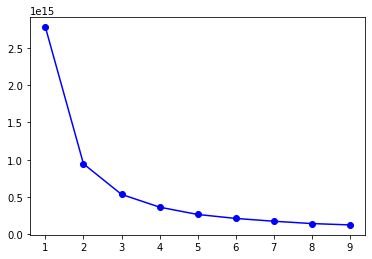

In [113]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [114]:
cluster  = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data['cluster'] = cluster.fit_predict(cluster_data)

# Visualize clusters using PCA

In [115]:
from sklearn.decomposition import PCA

In [116]:
# initialize pca object with 2 components
pca = PCA(n_components=2,random_state=0)

# create 'x' and 'y' columns donoting observation locations in decomposed form
cluster_data["x"] = pca.fit_transform(cluster_data[cluster_data.columns])[:,0]
cluster_data["y"] = pca.fit_transform(cluster_data[cluster_data.columns])[:,1]

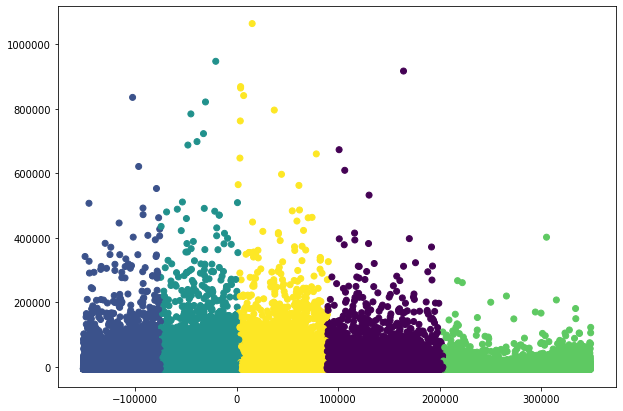

In [117]:
plt.figure(figsize=(10, 7))
plt.scatter(x=cluster_data["x"],y=cluster_data["y"],c=cluster.labels_)

In [118]:
cluster_data["cluster"].value_counts()

1    72383
2    70968
4    59934
0    44167
3     8262
Name: cluster, dtype: int64

In [119]:
invoice_customer_plant_jtd["clusters"] = cluster_data["cluster"]

In [120]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value,clusters
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"INSULATION TAPE, HEAD LIGHT HOLDER, BALANCE WE...","P001, P002",45.5,2201.78,0
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"HANDLE ASSY,BACK DOO, OIL FILTER-SPIN ON PETRO...","P001, P002",202.5,6025.86,2
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"MISC LABOR 0.5 HOURS, REPLACE CAMSHAFT OIL SEA...","P001, P002",189.0,3464.00,1
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"Paid Service-Minor, MFC PROLEUM C14/SL 15W40, ...","P001, P002",7.0,2065.75,1
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"REMOVE & REFIT WIPER BLADE REAR, WIPER T, NOZZ...","P001, P002",13.0,653.45,0


# Number of retail cutomers in all clusters

In [121]:
retail = {}
for i in invoice_customer_plant_jtd["clusters"].unique():
    
    new_df = invoice_customer_plant_jtd[["clusters","Cust Type"]]
    
    counts = invoice_customer_plant_jtd[["clusters","Cust Type"]]["Cust Type"].value_counts(ascending=False)
    
    if counts.index[0]=="Retail":
        
        retail[i]=counts[i]

In [122]:
retail

{0: 255368, 2: 134, 1: 154, 4: 15, 3: 30}

Text(0.5, 1.0, 'Revenue per month analysis')

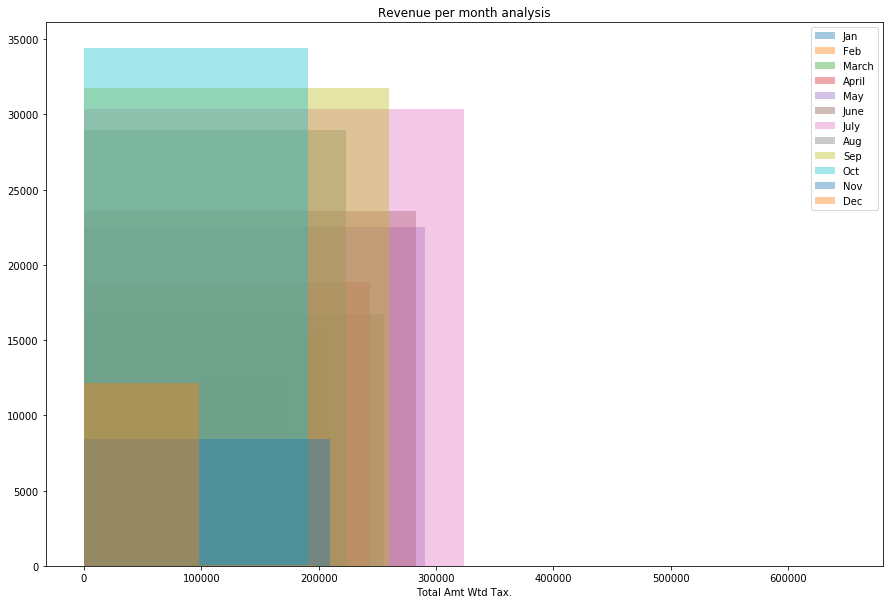

In [123]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==1]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Jan", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==2]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Feb", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==3]["Total Amt Wtd Tax."].dropna(), bins=2, label = "March", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==4]["Total Amt Wtd Tax."].dropna(), bins=2, label = "April", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==5]["Total Amt Wtd Tax."].dropna(), bins=2, label = "May", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==6]["Total Amt Wtd Tax."].dropna(), bins=2, label = "June", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==7]["Total Amt Wtd Tax."].dropna(), bins=2, label = "July", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==8]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Aug", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==9]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Sep", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==10]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Oct", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==11]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Nov", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Invoice month']==12]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Dec", ax = axes, kde =False)
ax.legend()
ax.set_title('Revenue per month analysis')


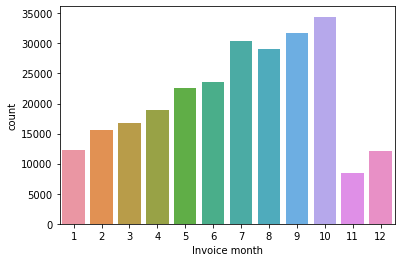

In [124]:
sns.countplot(invoice_customer_plant_jtd["Invoice month"])

In [125]:
invoice_customer_plant_jtd["State"].value_counts()

Tamil Nadu              90397
Maharashtra             38873
Karnataka               29137
Punjab                  14821
Madhya Pradesh          13479
Rajasthan               13437
Andhra Pradesh           9801
Uttar Pradesh            7459
Haryana                  6026
Gujarat                  5771
Telangana                5480
Bihar                    3252
Himachal Pradesh         3230
Chandigarh               2559
Uttarakhand              2507
Kerala                   2475
Odisha                   2299
Puducherry               1699
West Bengal              1322
Chhattisgarh              621
Delhi                     573
Jharkhand                 251
Assam                      98
Dadra and Nagar Hav.       36
Daman and Diu              32
Arunachal Pradesh          28
Jammu and Kashmir          12
Goa                        10
Andaman and Nico.In.        8
Nagaland                    6
Sikkim                      6
Tripura                     3
Manipur                     2
Megalaya  

Text(0.5, 1.0, 'Geo locaton based Revenue Analysis')

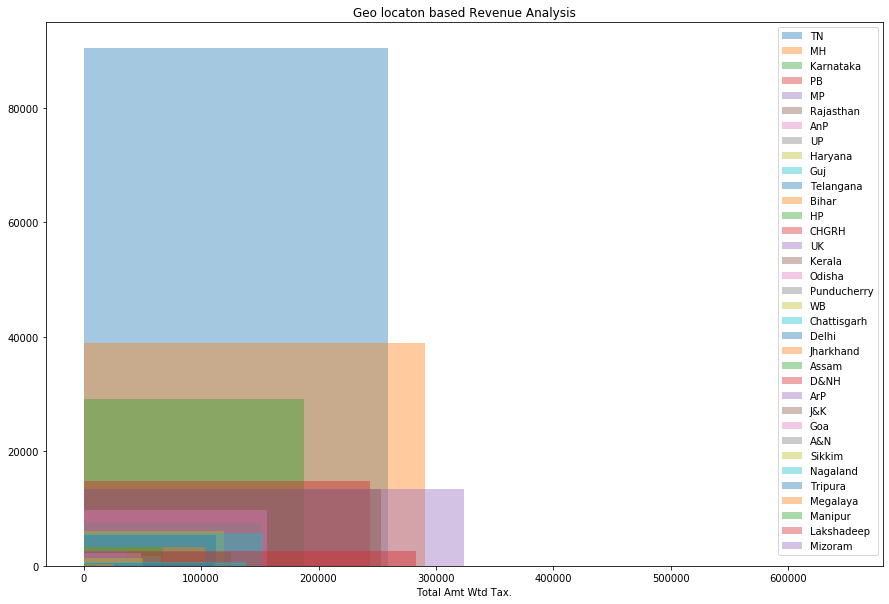

In [126]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Tamil Nadu"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TN", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Maharashtra"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MH", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Karnataka"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Karnataka", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Punjab"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "PB", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Madhya Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Rajasthan"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Rajasthan", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Andhra Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "AnP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Uttar Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "UP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Haryana"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Haryana", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Gujarat"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Guj", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Telangana"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Telangana", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Bihar"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Bihar", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Himachal Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Chandigarh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "CHGRH", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Uttarakhand"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "UK", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Kerala"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Kerala", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Odisha"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Odisha", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Puducherry"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Punducherry", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="West Bengal"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "WB", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Chhattisgarh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Chattisgarh", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Delhi"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Delhi", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Jharkhand"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Jharkhand", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Assam"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Assam", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Dadra and Nagar Hav."]["Total Amt Wtd Tax."].dropna(), bins=2, label = "D&NH", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Arunachal Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "ArP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Jammu and Kashmir"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "J&K", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Goa"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Goa", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Andaman and Nico.In."]["Total Amt Wtd Tax."].dropna(), bins=2, label = "A&N", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Sikkim"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Sikkim", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Nagaland"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Nagaland", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Tripura"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Tripura", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Megalaya"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Megalaya", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Manipur"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Manipur", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Lakshadweep"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Lakshadeep", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Mizoram"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Mizoram", ax = axes, kde =False)

ax.legend()
ax.set_title('Geo locaton based Revenue Analysis')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

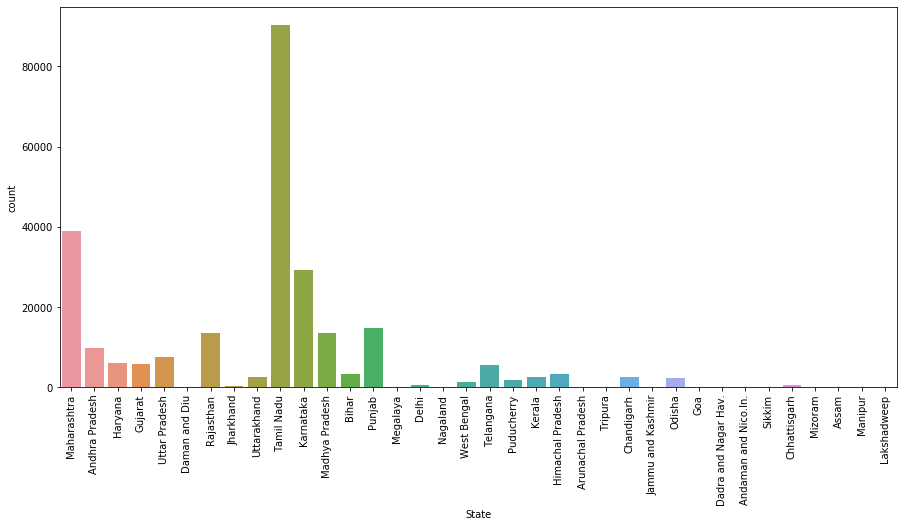

In [127]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["State"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

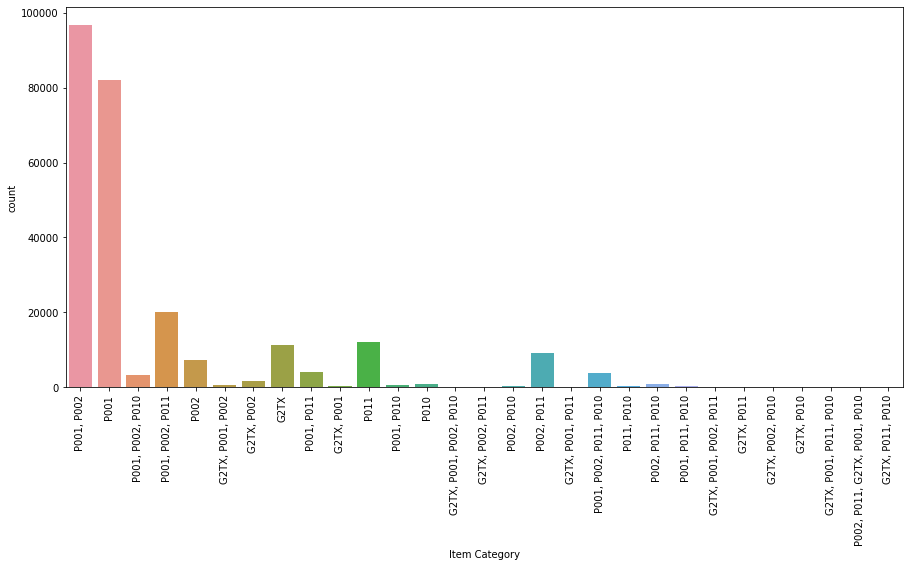

In [128]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Item Category"])
plt.xticks(rotation = 90)

In [129]:
invoice_customer_plant_jtd["Make"].value_counts()

MARUTI SUZUKI           73510
MAHINDRA &  MAHINDRA    45804
HYUNDAI                 38859
TATA MOTORS             33014
GENERAL MOTORS          16387
FORD                    11863
TOYOTA                  11396
HONDA                    6905
VOLKSWAGEN               4056
SKODA                    3600
FIAT                     3185
RENAULT                  2760
NISSAN                   2174
MITSUBISHI MOTORS         916
BMW                       192
HINDUSTAN MOTORS          188
MERCEDES BENZ             186
AUDI                      182
FORCE                     174
DAEWOO                    168
PREMIER AUTOMOBILES        77
SONALIKA                   69
LAND ROVER                 17
VOLVO                      13
SAN MOTORS                  7
JEEP                        6
PORCHE                      5
MORRIS                      1
Name: Make, dtype: int64

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Make of Cars based Revenue Analysis')

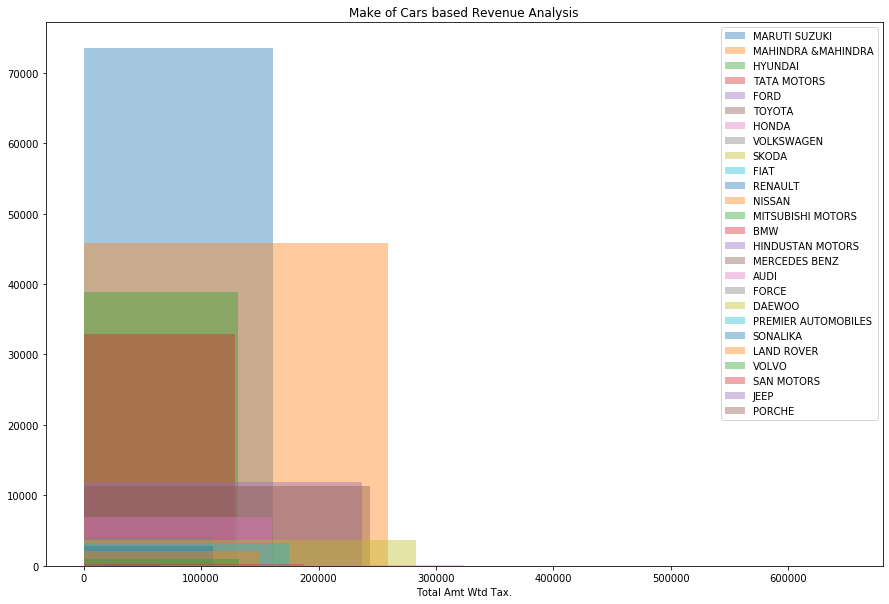

In [130]:
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MARUTI SUZUKI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MARUTI SUZUKI", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MAHINDRA &  MAHINDRA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MAHINDRA &MAHINDRA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="HYUNDAI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HYUNDAI", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="TATA MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TATA MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="FORD"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FORD", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="TOYOTA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TOYOTA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="HONDA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HONDA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="VOLKSWAGEN"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "VOLKSWAGEN", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="SKODA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SKODA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="FIAT"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FIAT", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="RENAULT"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "RENAULT", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="NISSAN"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "NISSAN", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MITSUBISHI MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MITSUBISHI MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="BMW"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "BMW", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="HINDUSTAN MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HINDUSTAN MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="MERCEDES BENZ"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MERCEDES BENZ", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="AUDI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "AUDI", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="FORCE"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FORCE", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="DAEWOO"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "DAEWOO", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="PREMIER AUTOMOBILES"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "PREMIER AUTOMOBILES", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="SONALIKA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SONALIKA", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="LAND ROVER"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "LAND ROVER", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="VOLVO"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "VOLVO", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="SAN MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SAN MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="JEEP"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "JEEP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["Make"]=="PORCHE"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "PORCHE", ax = axes, kde =False)

ax.legend()
ax.set_title('Make of Cars based Revenue Analysis')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

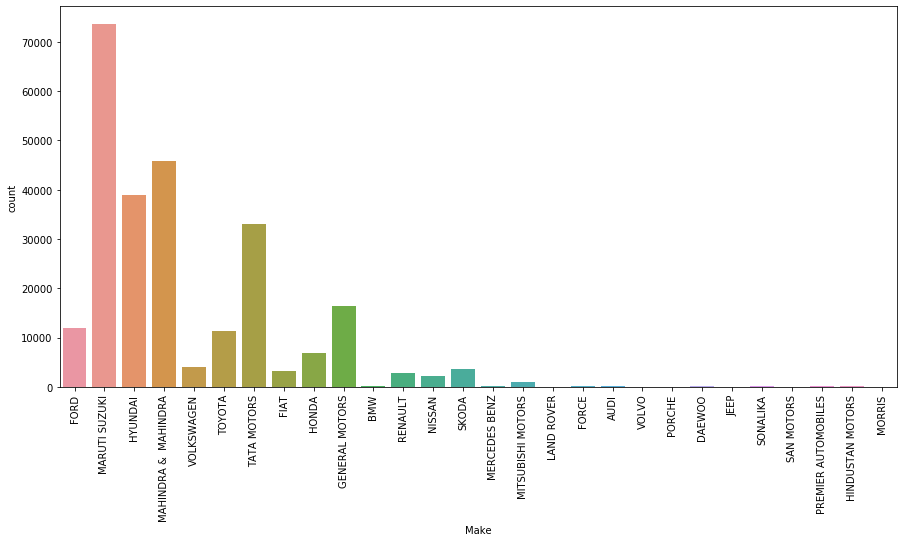

In [131]:
plt.figure(figsize=(15,7))
sns.countplot(invoice_customer_plant_jtd["Make"])
plt.xticks(rotation = 90)

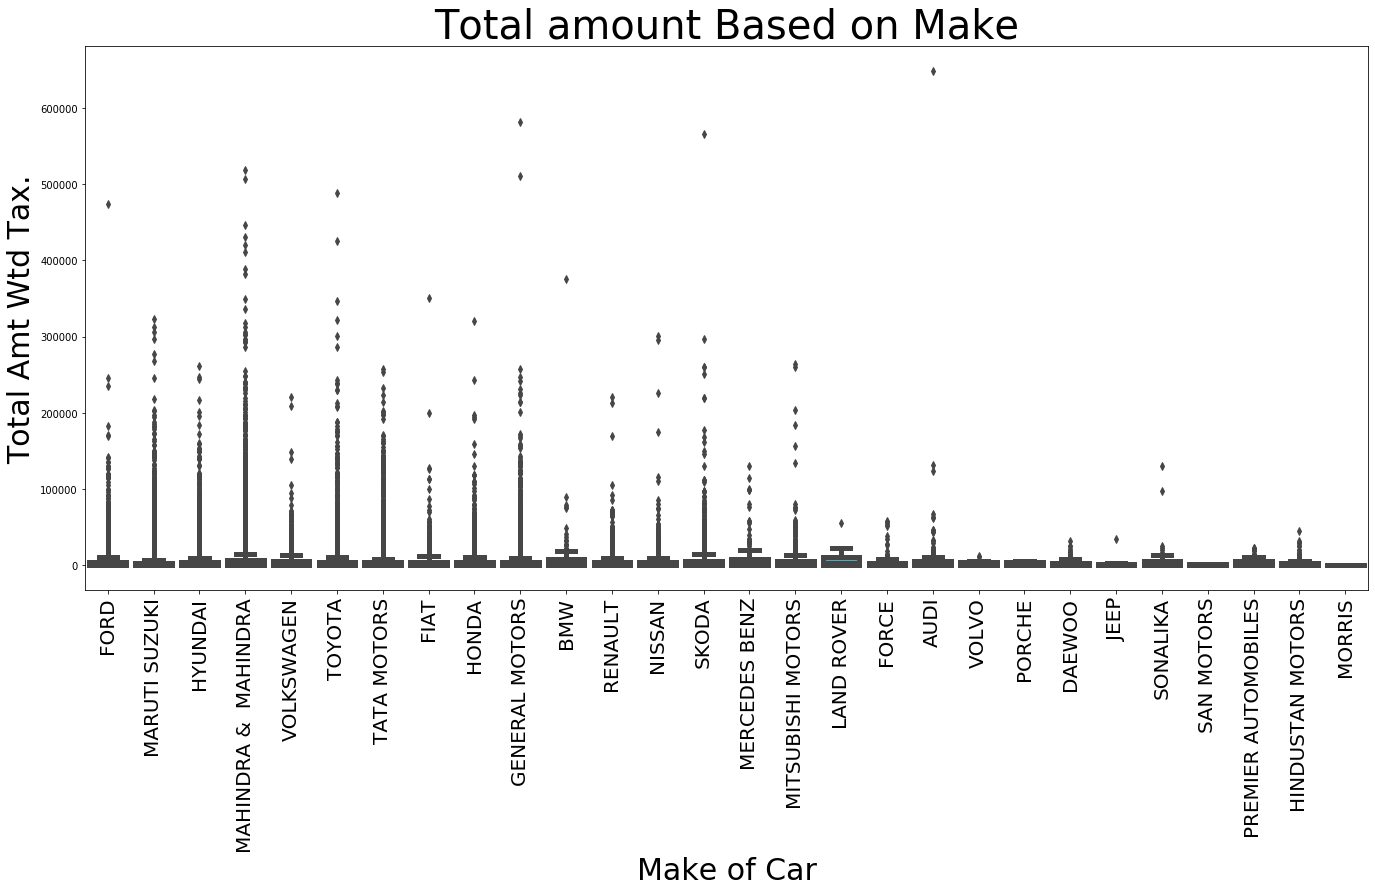

In [132]:
plt.figure(figsize=(23,10))
ax = sns.boxplot(x="Make", y="Total Amt Wtd Tax.", data=invoice_customer_plant_jtd,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Total Amt Wtd Tax.',fontsize=30)
plt.title('Total amount Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

In [133]:
cluster_data.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Net value,cluster,x,y
0,5,2,5,20,3,9,227460,0,1802.05,0.0,0.0,399.73,2201.78,6,1.0,2.0,45.5,2201.78,0,121408.105267,-3845.556094
1,5,4,13,20,1,0,413455,0,2874.80,0.0,0.0,3151.06,6025.86,7,1.0,2.0,202.5,6025.86,2,-64567.385174,2863.719542
2,5,4,13,20,4,0,446448,0,2799.96,0.0,0.0,664.04,3464.00,9,1.0,2.0,189.0,3464.00,1,-97573.032193,-1296.143081
3,5,4,9,20,4,0,487708,0,554.95,0.0,0.0,1510.80,2065.75,10,1.0,2.0,7.0,2065.75,1,-138838.319660,-3007.344338
4,5,4,12,20,3,0,220109,1,75.02,0.0,0.0,578.43,653.45,5,1.0,2.0,13.0,653.45,0,128752.440142,-6065.248779


In [134]:
data = cluster_data.drop(["Labour Total","Misc Total","OSL Total","Parts Total","Net value","cluster","x","y","Job Card No","Total Amt Wtd Tax."],1)


In [135]:
data["Revenue"] = cluster_data["Total Amt Wtd Tax."]

In [136]:
data.head()

,Cust Type,Order Type,Make,State,ServiceTime_category,Data Origin,KMs Reading,Invoice month,Partner Type,Title,Order Quantity,Revenue
0,5,2,5,20,3,9,0,6,1.0,2.0,45.5,2201.78
1,5,4,13,20,1,0,0,7,1.0,2.0,202.5,6025.86
2,5,4,13,20,4,0,0,9,1.0,2.0,189.0,3464.00
3,5,4,9,20,4,0,0,10,1.0,2.0,7.0,2065.75
4,5,4,12,20,3,0,1,5,1.0,2.0,13.0,653.45


In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scalar = MinMaxScaler()
df = scalar.fit_transform(data)
new_df = pd.DataFrame(df,columns=data.columns)

In [139]:
pca = PCA(n_components=1,random_state=0)
x = pca.fit_transform(data[data.drop(["Revenue"],1).columns])
data["x"] = x

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


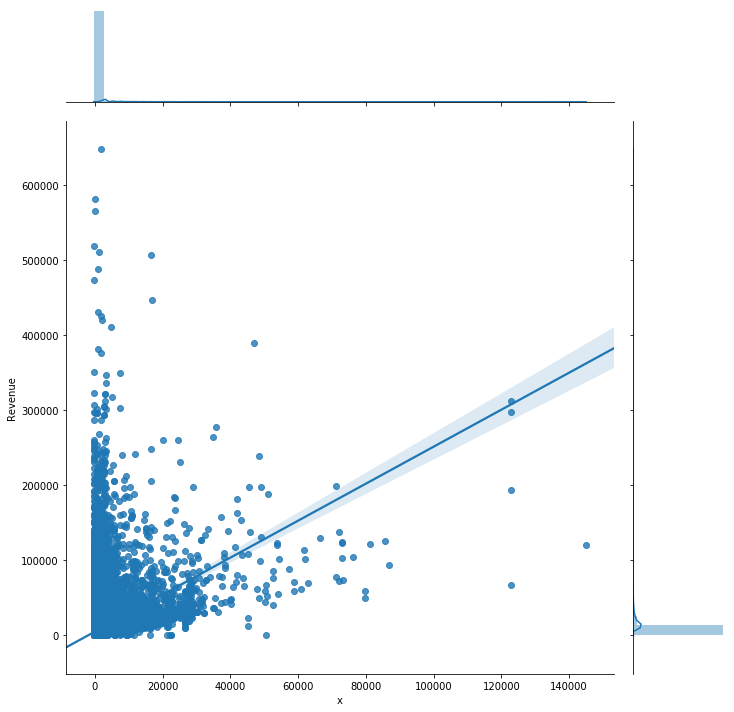

In [180]:
sns.jointplot(x='x', y='Revenue', data=data, kind='reg', size=10)
#plt.title('Regression plot')
plt.show()

In [141]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,State,Job Card No,KMs Reading,Labour Total,Make,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Invoice month,Partner Type,Data Origin,Title,ServiceTime_category,Description,Item Category,Order Quantity,Net value,clusters
0,Retail,80479,Maharashtra,227460,0,1802.05,FORD,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,6,1.0,Z010,2.0,super_fast,"INSULATION TAPE, HEAD LIGHT HOLDER, BALANCE WE...","P001, P002",45.5,2201.78,0
1,Retail,E15810,Maharashtra,413455,0,2874.80,MARUTI SUZUKI,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,7,1.0,Z001,2.0,mid,"HANDLE ASSY,BACK DOO, OIL FILTER-SPIN ON PETRO...","P001, P002",202.5,6025.86,2
2,Retail,E15810,Maharashtra,446448,0,2799.96,MARUTI SUZUKI,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,9,1.0,Z001,2.0,super_slow,"MISC LABOR 0.5 HOURS, REPLACE CAMSHAFT OIL SEA...","P001, P002",189.0,3464.00,1
3,Retail,73857,Maharashtra,487708,0,554.95,HYUNDAI,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,10,1.0,Z001,2.0,super_slow,"Paid Service-Minor, MFC PROLEUM C14/SL 15W40, ...","P001, P002",7.0,2065.75,1
4,Retail,E25519,Maharashtra,220109,1,75.02,MAHINDRA & MAHINDRA,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,5,1.0,Z001,2.0,super_fast,"REMOVE & REFIT WIPER BLADE REAR, WIPER T, NOZZ...","P001, P002",13.0,653.45,0


In [142]:
df = invoice_customer_plant_jtd.drop(["Customer No.","Job Card No","Labour Total","Misc Total","OSL Total",
                                      "Parts Total","Regn No","Data Origin","Description","Net value","clusters"],1)

In [143]:
df.head()

,Cust Type,State,KMs Reading,Make,Order Type,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,ServiceTime_category,Item Category,Order Quantity
0,Retail,Maharashtra,0,FORD,Paid Service,2201.78,6,1.0,2.0,super_fast,"P001, P002",45.5
1,Retail,Maharashtra,0,MARUTI SUZUKI,Running Repairs,6025.86,7,1.0,2.0,mid,"P001, P002",202.5
2,Retail,Maharashtra,0,MARUTI SUZUKI,Running Repairs,3464.00,9,1.0,2.0,super_slow,"P001, P002",189.0
3,Retail,Maharashtra,0,HYUNDAI,Running Repairs,2065.75,10,1.0,2.0,super_slow,"P001, P002",7.0
4,Retail,Maharashtra,1,MAHINDRA & MAHINDRA,Running Repairs,653.45,5,1.0,2.0,super_fast,"P001, P002",13.0


In [144]:
cat_df = df.select_dtypes(include = "object")

In [145]:
cat_df.head()

,Cust Type,State,Make,Order Type,ServiceTime_category,Item Category
0,Retail,Maharashtra,FORD,Paid Service,super_fast,"P001, P002"
1,Retail,Maharashtra,MARUTI SUZUKI,Running Repairs,mid,"P001, P002"
2,Retail,Maharashtra,MARUTI SUZUKI,Running Repairs,super_slow,"P001, P002"
3,Retail,Maharashtra,HYUNDAI,Running Repairs,super_slow,"P001, P002"
4,Retail,Maharashtra,MAHINDRA & MAHINDRA,Running Repairs,super_fast,"P001, P002"


In [146]:
dummy = pd.get_dummies(cat_df)
final_df = pd.concat([df,dummy],1)

In [147]:
final_df.drop(list(cat_df),1, inplace = True)

In [148]:
final_df.head()

,KMs Reading,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Cust Type_Corporate others,Cust Type_Corporate- M&M,Cust Type_Fleets,Cust Type_Franchise,Cust Type_MFCWL,Cust Type_Retail,State_Andaman and Nico.In.,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Hav.,State_Daman and Diu,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Lakshadweep,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Megalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,ServiceTime_category_fast,ServiceTime_category_mid,ServiceTime_category_slow,ServiceTime_category_super_fast,ServiceTime_category_super_slow,Item Category_G2TX,"Item Category_G2TX, P001","Item Category_G2TX, P001, P002","Item Category_G2TX, P001, P002, P010","Item Category_G2TX, P001, P002, P011","Item Category_G2TX, P001, P011","Item Category_G2TX, P001, P011, P010","Item Category_G2TX, P002","Item Category_G2TX, P002, P010","Item Category_G2TX, P002, P011","Item Category_G2TX, P010","Item Category_G2TX, P011","Item Category_G2TX, P011, P010",Item Category_P001,"Item Category_P001, P002","Item Category_P001, P002, P010","Item Category_P001, P002, P011","Item Category_P001, P002, P011, P010","Item Category_P001, P010","Item Category_P001, P011","Item Category_P001, P011, P010",Item Category_P002,"Item Category_P002, P010","Item Category_P002, P011","Item Category_P002, P011, G2TX, P001, P010","Item Category_P002, P011, P010",Item Category_P010,Item Category_P011,"Item Category_P011, P010"
0,0,2201.78,6,1.0,2.0,45.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6025.86,7,1.0,2.0,202.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3464.00,9,1.0,2.0,189.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2065.75,10,1.0,2.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,653.45,5,1.0,2.0,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
scalar = MinMaxScaler()
new_df = scalar.fit_transform(final_df)
scl_df = pd.DataFrame(new_df,columns=final_df.columns)

In [150]:
scl_df.head()

,KMs Reading,Total Amt Wtd Tax.,Invoice month,Partner Type,Title,Order Quantity,Cust Type_Corporate others,Cust Type_Corporate- M&M,Cust Type_Fleets,Cust Type_Franchise,Cust Type_MFCWL,Cust Type_Retail,State_Andaman and Nico.In.,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Hav.,State_Daman and Diu,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Lakshadweep,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Megalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,ServiceTime_category_fast,ServiceTime_category_mid,ServiceTime_category_slow,ServiceTime_category_super_fast,ServiceTime_category_super_slow,Item Category_G2TX,"Item Category_G2TX, P001","Item Category_G2TX, P001, P002","Item Category_G2TX, P001, P002, P010","Item Category_G2TX, P001, P002, P011","Item Category_G2TX, P001, P011","Item Category_G2TX, P001, P011, P010","Item Category_G2TX, P002","Item Category_G2TX, P002, P010","Item Category_G2TX, P002, P011","Item Category_G2TX, P010","Item Category_G2TX, P011","Item Category_G2TX, P011, P010",Item Category_P001,"Item Category_P001, P002","Item Category_P001, P002, P010","Item Category_P001, P002, P011","Item Category_P001, P002, P011, P010","Item Category_P001, P010","Item Category_P001, P011","Item Category_P001, P011, P010",Item Category_P002,"Item Category_P002, P010","Item Category_P002, P011","Item Category_P002, P011, G2TX, P001, P010","Item Category_P002, P011, P010",Item Category_P010,Item Category_P011,"Item Category_P011, P010"
0,0.000000,0.003607,0.454545,0.0,1.0,0.000313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.009506,0.545455,0.0,1.0,0.001393,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.005554,0.727273,0.0,1.0,0.001300,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.003398,0.818182,0.0,1.0,0.000048,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [151]:
pca = PCA(n_components=1,random_state=0)
x = pca.fit_transform(scl_df[scl_df.drop(["Total Amt Wtd Tax."],1).columns])
scl_df["x"] = x

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


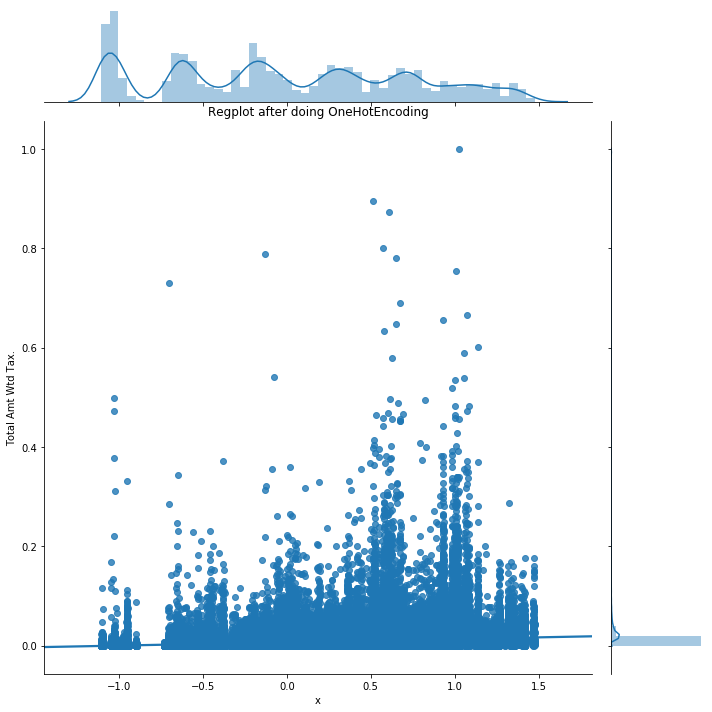

In [152]:
sns.jointplot(x='x', y='Total Amt Wtd Tax.', data=scl_df, kind='reg', size=10)
plt.title('Regplot after doing OneHotEncoding')
plt.show()

In [153]:
scl_df.shape

(255714, 119)

In [154]:
X = scl_df.drop(["Total Amt Wtd Tax."],1)
y = scl_df["Total Amt Wtd Tax."]

In [155]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [156]:
X_train,X_test,y_train,y_test = tts(X,y, random_state=42, test_size = 0.2)

In [157]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [158]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
r2_score_knn = r2_score(y_pred_knn,y_test)
r2_score_knn

-0.763357300179087

In [159]:
dt = DecisionTreeRegressor(max_depth=50)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
r2_score_dt = r2_score(y_pred_dt,y_test)
r2_score_dt

0.013222472231168347

In [160]:
# svr = SVR()
# svr.fit(X_train,y_train)
# y_pred_svr = svr.predict(X_test)
# r2_score_svr = r2_score(y_pred_svr,y_test)
# r2_score_svr

In [161]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
r2_score_lr = r2_score(y_pred_lr,y_test)
r2_score_lr

-1.9553397256233396e-05

In [162]:
rd = Ridge()
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)
r2_score_rd = r2_score(y_pred_rd,y_test)
r2_score_rd

-1.4420377976158254

In [163]:
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)
r2_score_ls = r2_score(y_pred_ls,y_test)
r2_score_ls

-4.267639087401186e+32

In [172]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [173]:
mae_knn = mean_absolute_error(y_test,y_pred_knn)
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mae_rd = mean_absolute_error(y_test,y_pred_rd)
mae_ls = mean_absolute_error(y_test,y_pred_ls)

In [174]:
rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred_knn))
rmse_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmse_rd = np.sqrt(mean_squared_error(y_test,y_pred_rd))
rmse_ls = np.sqrt(mean_squared_error(y_test,y_pred_ls))

In [179]:
acc_df = pd.DataFrame({
    'Model': ['KNN',"Decision Tree", "Linear Reg","Ridge","Lasso"],
    'MAE': [mae_knn, mae_dt, mae_lr, mae_rd, mae_ls],
    'RMSE': [rmse_knn, rmse_dt, rmse_lr, rmse_rd, rmse_ls]})

acc_df = acc_df.set_index('Model')
acc_df

,MAE,RMSE
Model,,
KNN,0.004860,1.559577e-02
Decision Tree,0.005185,1.739265e-02
Linear Reg,40763.384249,9.218564e+06
Ridge,0.005788,1.530448e-02
Lasso,0.007566,1.791819e-02
